# Why ReLU in Deep Learning and the best practice to use it

This is a notebook for the medium article [Why Rectified Linear Unit (ReLU) in Deep Learning and the best practice to use it with TensorFlow](https://bindichen.medium.com/why-rectified-linear-unit-relu-in-deep-learning-and-the-best-practice-to-use-it-with-tensorflow-e9880933b7ef)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Helper function

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

## 1. Sigmoid and Tanh

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
z = np.linspace(-7, 7, 200)

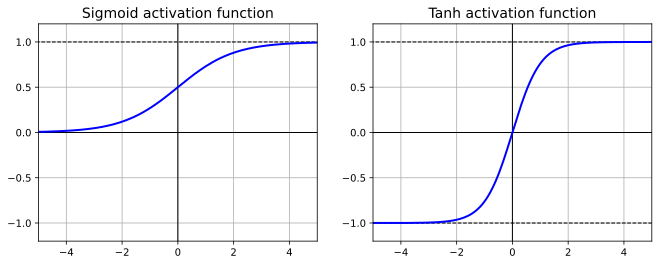

In [5]:
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
# coordinate 
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
plt.plot([-7,7], [1,1], 'k--', linewidth=1)
# Plot sigmoid
plt.plot(z, sigmoid(z), "b-", linewidth=2, label="Sigmoid")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(1,2,2)
# coordinate 
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([-5, 5], [-1, -1], 'k--', linewidth=1)
plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
plt.plot([-7,7], [1,1], 'k--', linewidth=1)
# Plot
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.grid(True)
plt.title("Tanh activation function", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.show()

In [6]:
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

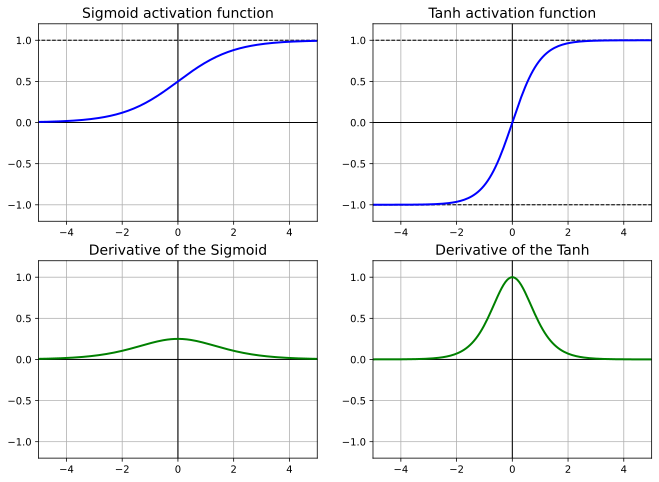

In [7]:
plt.figure(figsize=(11,8))

plt.subplot(2,2,1)
# coordinate 
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
plt.plot([-7,7], [1,1], 'k--', linewidth=1)
# Plot sigmoid
plt.plot(z, sigmoid(z), "b-", linewidth=2, label="Sigmoid")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(2,2,2)
# coordinate 
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([-5, 5], [-1, -1], 'k--', linewidth=1)
plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
plt.plot([-7,7], [1,1], 'k--', linewidth=1)
# Plot
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.grid(True)
plt.title("Tanh activation function", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(2,2,3)
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
plt.plot(z, derivative(sigmoid, z), "g-", linewidth=2, label="Sigmoid")
plt.grid(True)
plt.title("Derivative of the Sigmoid", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(2,2,4)
# coordinate 
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
# Plot
plt.plot(z, derivative(np.tanh, z), "g-", linewidth=2, label="Tanh")
plt.grid(True)
plt.title("Derivative of the Tanh", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.show()

## Fashion MMIST dataset

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('float64')

## 1. Training a deep NN with ReLU

Let's first build a deep NN with ReLU and default `kernel_initializer`

In [11]:
tf.random.set_seed(42)
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model(activation): 
    # By default, Keras uses Glorot initialization
    model = keras.models.Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(300, activation=activation))
    for layer in range(49):
        model.add(Dense(100, activation=activation))
    model.add(Dense(10, activation="softmax"))
    
    
    model.compile(
        optimizer='sgd', 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return model

In [12]:
model_relu = create_model(activation = 'relu')

In [13]:
history_relu = model_relu.fit(
    X_train, 
    y_train, 
    epochs=10,
    validation_data=(X_valid, y_valid),
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 35s 639us/sample - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 2/10
55000/55000 [==============================] - 34s 627us/sample - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 3/10
55000/55000 [==============================] - 34s 620us/sample - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.1008
Epoch 4/10
55000/55000 [==============================] - 34s 616us/sample - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3030 - val_accuracy: 0.0914
Epoch 5/10
55000/55000 [==============================] - 34s 619us/sample - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 6/10
55000/55000 [==============================] - 33s 597us/sample - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 7/10
55000/55000 [=====================

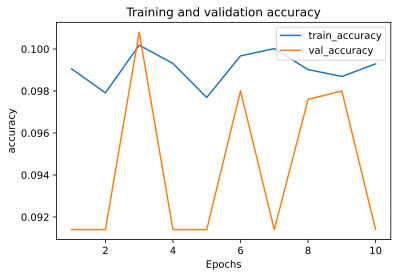

In [14]:
plot_metric(history_relu, 'accuracy')

In this case, we can see that performance is quite poor on both the train and validation sets achieving around 10% accuracy. This suggests that the model as configured could not learn the problem nor generalize a solution.

## 2. Train with He initialization and a smaller learning rate

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


def create_model(activation, k_init): 
    model = keras.models.Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(
        300, activation=activation, kernel_initializer=k_init))
    for layer in range(49):
        model.add(Dense(100, activation=activation, kernel_initializer=k_init))
    model.add(Dense(10, activation="softmax"))
    
    model.compile(
        optimizer=keras.optimizers.SGD(lr=1e-3), 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return model

model_with_he = create_model(
    activation = 'relu', 
    k_init='he_normal'
)

In [17]:
history_relu_he = model_with_he.fit(
    X_train, 
    y_train, 
    epochs=10,
    validation_data=(X_valid, y_valid),
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 33s 600us/sample - loss: 1.3974 - accuracy: 0.4666 - val_loss: 1.3329 - val_accuracy: 0.5898
Epoch 2/10
55000/55000 [==============================] - 34s 609us/sample - loss: 0.7728 - accuracy: 0.7079 - val_loss: 0.7561 - val_accuracy: 0.7154
Epoch 3/10
55000/55000 [==============================] - 33s 596us/sample - loss: 0.6438 - accuracy: 0.7652 - val_loss: 0.6239 - val_accuracy: 0.7694
Epoch 4/10
55000/55000 [==============================] - 32s 585us/sample - loss: 0.5597 - accuracy: 0.7920 - val_loss: 0.5197 - val_accuracy: 0.8118
Epoch 5/10
55000/55000 [==============================] - 33s 598us/sample - loss: 0.5120 - accuracy: 0.8142 - val_loss: 0.5267 - val_accuracy: 0.8054
Epoch 6/10
55000/55000 [==============================] - 33s 599us/sample - loss: 0.4806 - accuracy: 0.8263 - val_loss: 0.4707 - val_accuracy: 0.8302
Epoch 7/10
55000/55000 [=====================

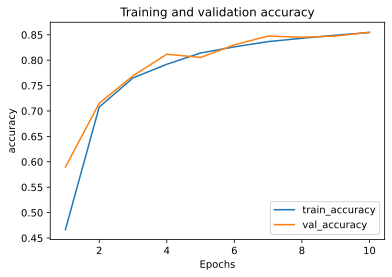

In [18]:
plot_metric(history_relu_he, 'accuracy')

## 3. Comparing to moddels with Sigmoid and Tanh

In [38]:
tf.random.set_seed(42)
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model(activation): 
    # By default, Keras uses Glorot initialization with a uniform distribution.
    model = keras.models.Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(300, activation=activation))
    for layer in range(49):
        model.add(Dense(100, activation=activation))
    model.add(Dense(10, activation="softmax"))
     
    model.compile(
        optimizer=keras.optimizers.SGD(lr=1e-3), 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return model


### 3.1 Model with Sigmoid

In [21]:
model_sigmoid = create_model(activation = 'sigmoid')

In [22]:
history_sigmoid = model_sigmoid.fit(
    X_train, 
    y_train, 
    epochs=10,
    validation_data=(X_valid, y_valid),
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 39s 702us/sample - loss: 2.3070 - accuracy: 0.0997 - val_loss: 2.3056 - val_accuracy: 0.0976
Epoch 2/10
55000/55000 [==============================] - 38s 691us/sample - loss: 2.3047 - accuracy: 0.1002 - val_loss: 2.3049 - val_accuracy: 0.1024
Epoch 3/10
55000/55000 [==============================] - 39s 706us/sample - loss: 2.3048 - accuracy: 0.1005 - val_loss: 2.3051 - val_accuracy: 0.1024
Epoch 4/10
55000/55000 [==============================] - 39s 707us/sample - loss: 2.3045 - accuracy: 0.1001 - val_loss: 2.3046 - val_accuracy: 0.0986
Epoch 5/10
55000/55000 [==============================] - 38s 700us/sample - loss: 2.3046 - accuracy: 0.1012 - val_loss: 2.3046 - val_accuracy: 0.1012
Epoch 6/10
55000/55000 [==============================] - 38s 699us/sample - loss: 2.3045 - accuracy: 0.1020 - val_loss: 2.3041 - val_accuracy: 0.1012
Epoch 7/10
55000/55000 [=====================

### 3.2 Model with Tanh

In [39]:
model_tanh = create_model(activation = 'tanh')

In [40]:
history_tanh = model_tanh.fit(
    X_train, 
    y_train, 
    epochs=10,
    validation_data=(X_valid, y_valid),
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 41s 750us/sample - loss: 1.3429 - accuracy: 0.5505 - val_loss: 0.9464 - val_accuracy: 0.6960
Epoch 2/10
55000/55000 [==============================] - 40s 735us/sample - loss: 0.8320 - accuracy: 0.7037 - val_loss: 0.7531 - val_accuracy: 0.7298
Epoch 3/10
55000/55000 [==============================] - 39s 709us/sample - loss: 0.6943 - accuracy: 0.7383 - val_loss: 0.6389 - val_accuracy: 0.7572
Epoch 4/10
55000/55000 [==============================] - 39s 711us/sample - loss: 0.6333 - accuracy: 0.7588 - val_loss: 0.5926 - val_accuracy: 0.7770
Epoch 5/10
55000/55000 [==============================] - 39s 706us/sample - loss: 0.5949 - accuracy: 0.7748 - val_loss: 0.5726 - val_accuracy: 0.7896
Epoch 6/10
55000/55000 [==============================] - 39s 707us/sample - loss: 0.5659 - accuracy: 0.7895 - val_loss: 0.5433 - val_accuracy: 0.7972
Epoch 7/10
55000/55000 [=====================

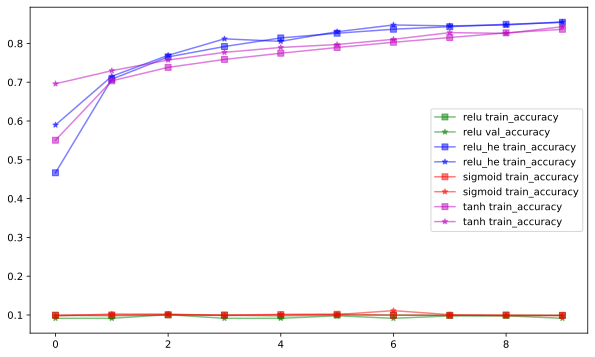

In [46]:
plt.figure(figsize=(10,6))

plt.plot(history_relu.history['accuracy'], 'gs-', label='relu train_accuracy', alpha=0.5)
plt.plot(history_relu.history['val_accuracy'], 'g*-', label='relu val_accuracy', alpha=0.5)

plt.plot(history_relu_he.history['accuracy'], 'bs-', label='relu_he train_accuracy', alpha=0.5)
plt.plot(history_relu_he.history['val_accuracy'], 'b*-', label='relu_he train_accuracy', alpha=0.5)

plt.plot(history_sigmoid.history['accuracy'], 'rs-', label='sigmoid train_accuracy', alpha=0.5)
plt.plot(history_sigmoid.history['val_accuracy'], 'r*-', label='sigmoid train_accuracy', alpha=0.5)

plt.plot(history_tanh.history['accuracy'], 'ms-', label='tanh train_accuracy', alpha=0.5)
plt.plot(history_tanh.history['val_accuracy'], 'm*-', label='tanh train_accuracy', alpha=0.5)

plt.legend()
plt.show()

Conclusion:
* In this case, the model trained with ReLU and He Inititalization has the best performance, followed by the model trained with Tanh. 
* We can see that models with ReLU and  Sigmoid are quite poor on both the train and validation sets achieving around 10% accuracy. This suggests that the two models as configured could not learn the problem nor generalize a solution.
* In addition, we found the average execution time for the model trained with ReLU is about 32 seconds per epoch, comparing to average 40 seconds per epoch for the model trained with Sigmoid or  Tanh. It is 25% increase in term of the the convergence speed.